In [3]:
# imports and setup 
from bs4 import BeautifulSoup

import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6) 

In [5]:
#reading csv as a Pandas dataframe
data = pd.read_csv('../data/raw/WALS.csv')
data.head()

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
0,aab,NaN,NaN,Arapesh (Abu),-3.450000,142.950000,Kombio-Arapesh,Torricelli,NaN,PG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aar,aiw,aari1239,Aari,6.000000,36.583333,South Omotic,Afro-Asiatic,Africa,ET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aba,aau,abau1245,Abau,-4.000000,141.250000,Upper Sepik,Sepik,Papunesia,PG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,abb,shu,chad1249,Arabic (Chadian),13.833333,20.833333,Semitic,Afro-Asiatic,Africa,TD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abd,abi,abid1235,Abidji,5.666667,-4.583333,Kwa,Niger-Congo,Africa,CI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
#creating one-hot encoding representations of features and families
feature_dummies = pd.get_dummies(data[data.columns.to_list()[10:]],dtype='int',dummy_na=True)
family_dummies = pd.get_dummies(data['family'],dtype='int')
names = data[data.columns.to_list()[:10]]
newdata = pd.concat([names,family_dummies,feature_dummies], axis = 1)
newdata.shape
newdata.dropna()

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,58B Number of Possessive Nouns_2 One,58B Number of Possessive Nouns_3 Two to four,58B Number of Possessive Nouns_4 Five or more,58B Number of Possessive Nouns_nan,79B Suppletion in Imperatives and Hortatives_1 A regular and a suppletive form alternate,79B Suppletion in Imperatives and Hortatives_2 Imperative,79B Suppletion in Imperatives and Hortatives_3 Hortative,79B Suppletion in Imperatives and Hortatives_4 Imperative and Hortative,79B Suppletion in Imperatives and Hortatives_5 None (= no suppletive imperatives reported in the reference material),79B Suppletion in Imperatives and Hortatives_nan
1,aar,aiw,aari1239,Aari,6.000000,36.583333,South Omotic,Afro-Asiatic,Africa,ET,...,0,0,0,1,0,0,0,0,0,1
2,aba,aau,abau1245,Abau,-4.000000,141.250000,Upper Sepik,Sepik,Papunesia,PG,...,0,0,0,1,0,0,0,0,0,1
3,abb,shu,chad1249,Arabic (Chadian),13.833333,20.833333,Semitic,Afro-Asiatic,Africa,TD,...,0,0,0,1,0,0,0,0,0,1
4,abd,abi,abid1235,Abidji,5.666667,-4.583333,Kwa,Niger-Congo,Africa,CI,...,0,0,0,1,0,0,0,0,0,1
5,abe,apc,nort3139,Arabic (Beirut),33.916667,35.500000,Semitic,Afro-Asiatic,Eurasia,LB,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2674,zte,zpz,texm1235,Zapotec (Texmelucan),16.500000,-97.166667,Zapotecan,Oto-Manguean,North America,MX,...,0,0,0,1,0,0,0,0,0,1
2675,zul,zul,zulu1248,Zulu,-30.000000,30.000000,Bantoid,Niger-Congo,Africa,ZA,...,0,0,0,0,0,0,0,0,1,0
2676,zun,zun,zuni1245,Zuni,35.083333,-108.833333,Zuni,Zuni,North America,US,...,0,0,0,1,0,0,0,0,1,0
2677,zya,zav,yatz1235,Zapotec (Yatzachi),17.200000,-96.200000,Zapotecan,Oto-Manguean,North America,MX,...,0,0,0,1,0,0,0,0,0,1


In [123]:
#Looking over the families, we may want to focus on just a handful
newdata['family'].value_counts()[:15]

family
Niger-Congo         327
Austronesian        325
Indo-European       176
Sino-Tibetan        149
Afro-Asiatic        145
Pama-Nyungan        122
Trans-New Guinea     88
other                72
Altaic               65
Oto-Manguean         56
Austro-Asiatic       49
Eastern Sudanic      47
Uto-Aztecan          44
Mayan                35
Algic                31
Name: count, dtype: int64

In [131]:
#Creating dataframes for different families
Indo_European_data = newdata.loc[newdata["family"] == "Indo-European"]
Austronesian_data = newdata.loc[newdata["family"] == "Austronesian"]
Niger_Congo_data = newdata.loc[newdata["family"] == "Indo-European"]
Semitic_data = newdata.loc[newdata["family"] == "Semitic"]
Sino_Tibetan_data = newdata.loc[newdata["family"] == "Sino-Tibetan"]
Austroasiatic_data = newdata.loc[newdata["family"] == "Austro-Asiatic"]
Afro_Asiatic_data = newdata.loc[newdata["family"] == "Afro-Asiatic"]
Maya_data = newdata.loc[newdata["family"] == "Maya"]
Pama_Nyungan_data = newdata.loc[newdata["family"] == "Pama-Nyungan"] 
Oto_Manguean_data = newdata.loc[newdata["family"] == "Oto-Manguean"]
Altaic_data = newdata.loc[newdata["family"] == "Altaic"]
Eastern_Sudanic_data = newdata.loc[newdata["family"] == "Eastern Sudanic"]

#recombining
reduced_data = pd.concat([Indo_European_data,Austronesian_data,Niger_Congo_data,Semitic_data,Austroasiatic_data,Afro_Asiatic_data,
Maya_data,Pama_Nyungan_data,Oto_Manguean_data,Altaic_data,Eastern_Sudanic_data])

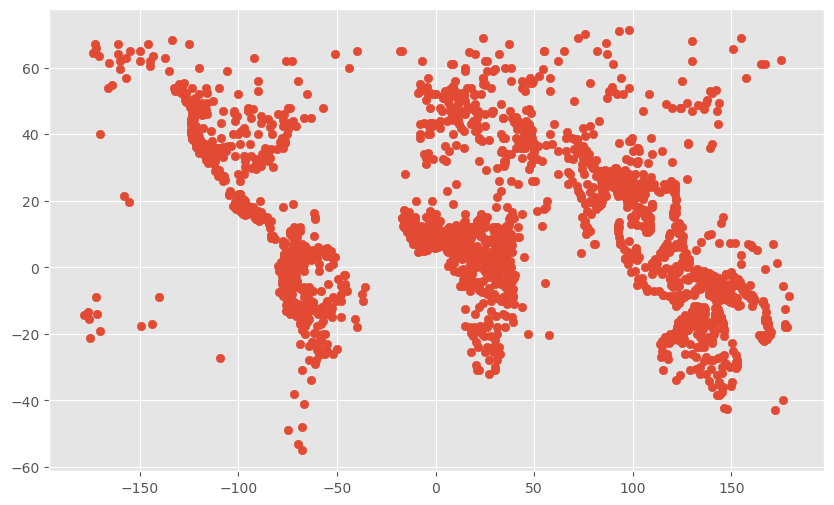

In [133]:
#A map of data—looks good!
plt.scatter(newdata['longitude'],newdata['latitude'])
plt.show()

#Writing csvs
newdata.to_csv('cleaned_language_data.csv', index=False)
reduced_data.to_csv('cleaned_language_data_select_families.csv', index=False)